In [ ]:
Assignment on Classification

Logistic Regression Accuracy: 0.9667
Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Support Vector Machine Accuracy: 0.9667

Best Model: Decision Tree with Accuracy: 1.0000


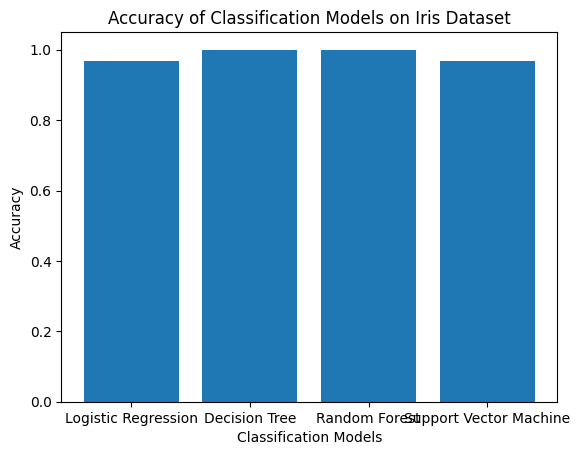

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Read the dataset to Python environment
iris_data = pd.read_excel('/home/nandu/Downloads/iris (1).xls')

# Step 2: Necessary pre-processing steps
# Assuming the target variable is 'Classification' and the features are other columns
X = iris_data.drop('Classification', axis=1)
y = iris_data['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_imputed = scaler.fit_transform(X_train_imputed)
X_test_imputed = scaler.transform(X_test_imputed)

# Step 3: Find out which classification model gives the best result
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

# Identify the best model
best_model = max(results, key=results.get)
print(f'\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}')

# Justify your answer
# You can justify your answer by looking at the accuracy scores and potentially using other metrics.
# Additionally, you may consider the interpretability, simplicity, and generalization ability of the models.

# Visualize the results
plt.bar(results.keys(), results.values())
plt.title('Accuracy of Classification Models on Iris Dataset')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.show()
